<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

# **Materials:**
To try out the code yourself , feel free to download the images and the database of Q3 at the link below:

https://drive.google.com/file/d/1cFfsjC78Hx0pOLMH6b39ovOJUnNjhJVL/view?usp=sharing

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [16]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [17]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [18]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [19]:
npR

array([[-1.5749, -0.4826, -1.4262, -0.8092, -1.4589],
       [ 0.    ,  0.5205, -0.0928,  0.672 ,  0.4987],
       [ 0.    ,  0.    , -0.1985,  0.0345, -0.01  ],
       [ 0.    ,  0.    ,  0.    ,  0.5235, -0.1477],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0109]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [20]:
def normalizer(Q):
  for j in range(Q.shape[1]):
    Q[:,j] /= np.linalg.norm(Q[:,j])
  return Q


def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for j in range(n):
      a_j = A[:,j]
      Q[:,j] = a_j
      for lower_j in range(j):
        Q_Lj = Q[:,lower_j]
        nominator = np.dot(Q_Lj.T , a_j)
        denominator = np.dot(Q_Lj.T , Q_Lj)
        Q[:,j] -= np.dot(nominator/denominator , Q_Lj)

    Q = normalizer(Q)
    R = np.dot(Q.T, A)
    ##Your Code ends here
    return Q, R

In [21]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [22]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [23]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [24]:
def mgs(A):
    V = A.copy()
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    for i in range(n):
      R[i,i] = np.linalg.norm(V[:,i])
      Q[:,i] = V[:,i] / R[i,i]
      for j in range(i+1, n):
        R[i,j] = np.dot(Q[:,i], V[:,j])
        V[:,j] -= R[i,j] * Q[:,i]
    ##Your Code ends here
    return Q, R

In [25]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [26]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [27]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')           # for sake of dark theme lovers :)
from matplotlib import rcParams
%matplotlib inline

In [28]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                               # values between 2^-1 and 2^-(n+1)

In [29]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

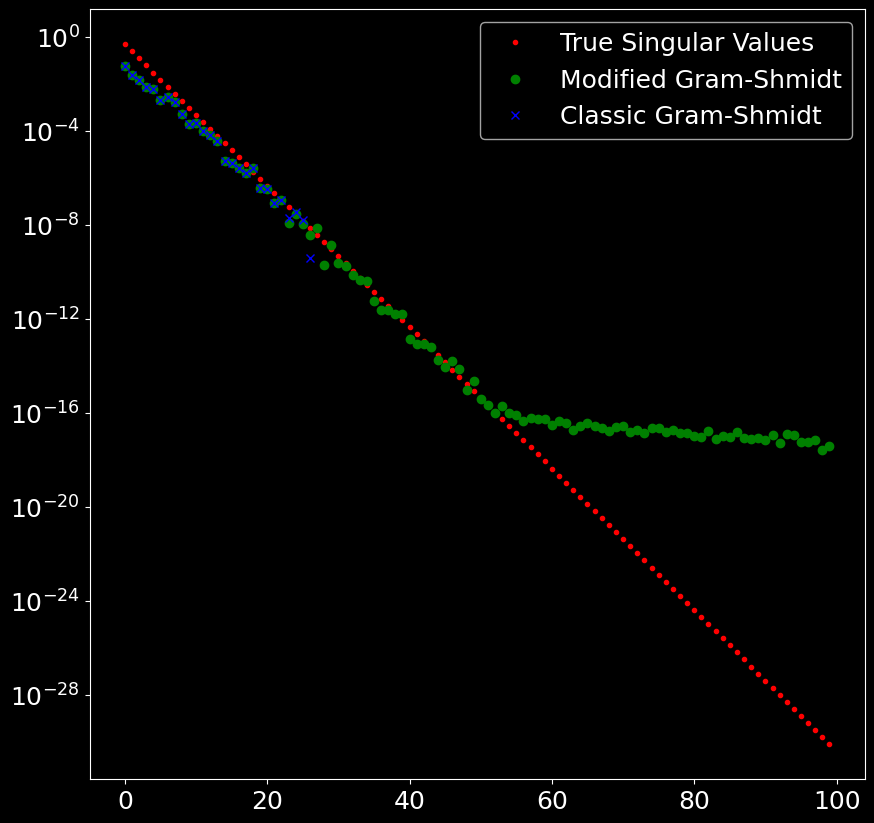

In [31]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

**📝| Notice:**

I think the reason that result of MGS gets flattened around 10^-17 is the limitation in displaying digits, tho the calculations are indeed taking place in numpy64 space.

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

**💬 | A brief chat:**

The reason that the eigenvalues doesn't change when we find the new A = RQ is its similarity to QR. Due to the format of R, iterating more and more makes upper and lower data of diagnal values fade into zero, leaving eigenvalues on the main diagonal.

In [32]:
##Your Code start here
def QR_alg(A,iteration):
  if not iteration:
    EVs = np.array(A).diagonal().copy()
    EVs.sort()
    return EVs

  else:
    Q_i, R_i = cgs(A)
    A_next = R_i @ Q_i
    return QR_alg(A_next, iteration-1)
##Your Code ends here

In [33]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
print("\n --- Manual-function (itr=1) ---")
EVs = QR_alg(A,1)
print(EVs)

print("\n --- Manual-function (itr=5) ---")
EVs = QR_alg(A,5)
print(EVs)

print("\n --- Manual-function (itr=10) ---")
EVs = QR_alg(A,10)
print(EVs)

print("\n --- Manual-function (itr=20) ---")
EVs = QR_alg(A,20)
print(EVs)

print("\n --- Manual-function (itr=100) ---")
EVs = QR_alg(A,100)
print(EVs)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]

 --- Manual-function (itr=1) ---
[0. 2. 2. 3.]

 --- Manual-function (itr=5) ---
[-0.247   1.4541  2.7929  3.    ]

 --- Manual-function (itr=10) ---
[-0.247   1.4451  2.8019  3.    ]

 --- Manual-function (itr=20) ---
[-0.247   1.445   2.8019  3.    ]

 --- Manual-function (itr=100) ---
[-0.247   1.445   2.8019  3.    ]


As we can see, it starts to converge to eigen values after some iterations.

##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

In [34]:
#Required libs:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')              # for sake of dark theme lovers :)
from google.colab.patches import cv2_imshow
from sklearn.metrics import mean_squared_error

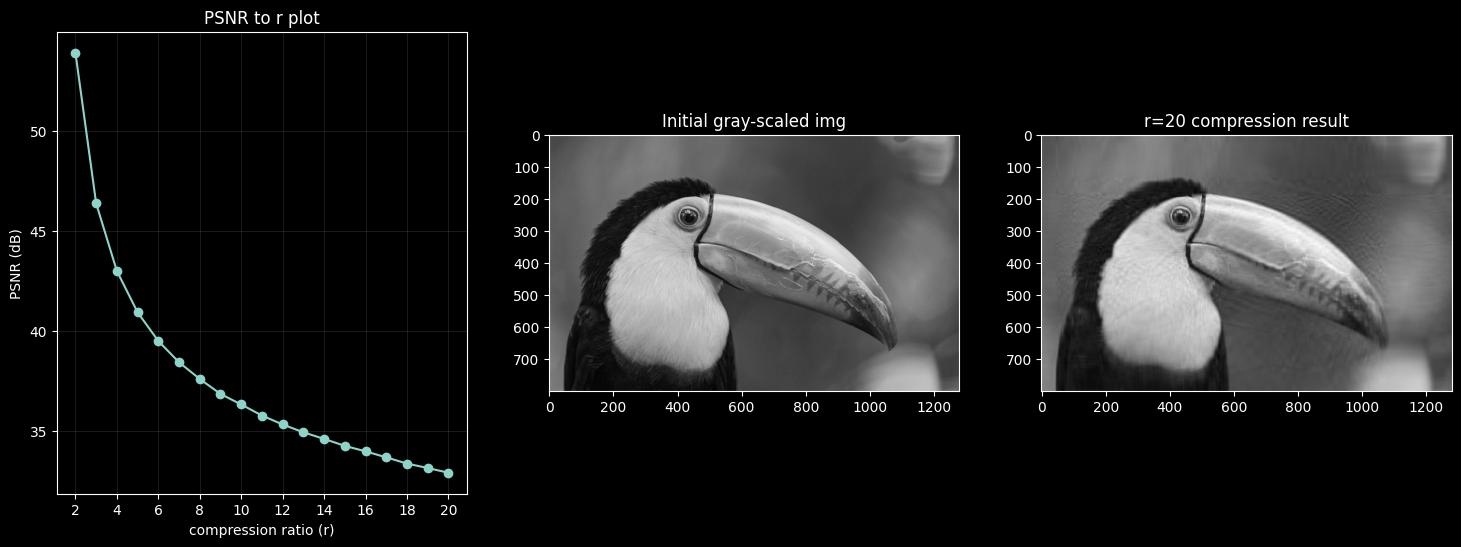

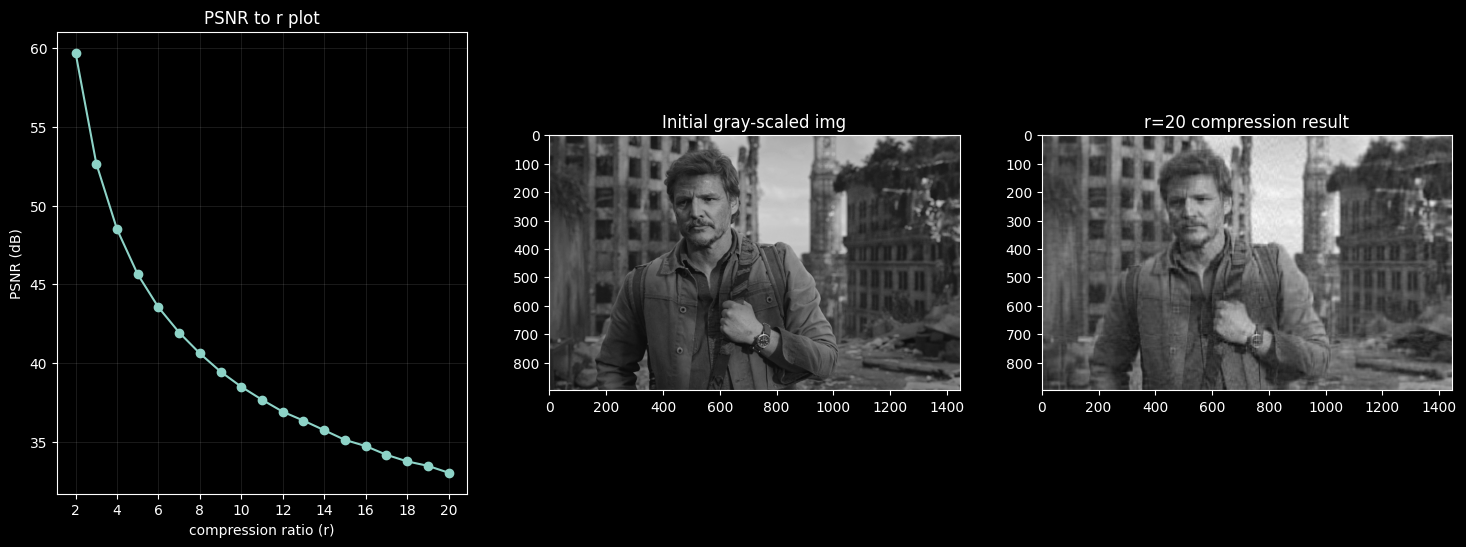

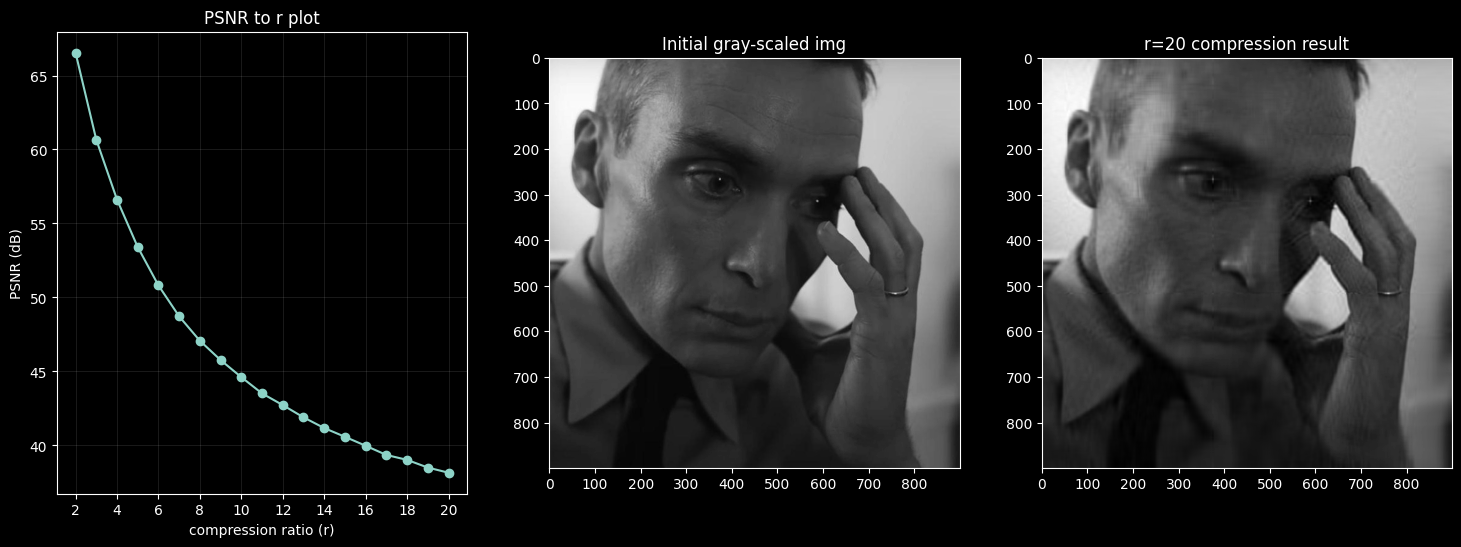

In [36]:
##Your Code start here
def PSNR_plotter(pic):
  if(type(pic)==str):
    img = cv2.imread(pic)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  else:
    gray_image = pic

  m,n = gray_image.shape
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
  U, S, VT = np.linalg.svd(gray_image, full_matrices=False)
  psnr = []

  for r in range(2,21):
    boundary = int(m/r)
    recon_img = U[:, :boundary] @ np.diag(S[:boundary]) @ VT[:boundary, :]
    MSE = mean_squared_error(gray_image, recon_img)
    psnr.append(10*math.log10((255*255)/MSE))

    if r==20:
      recon_img20 = recon_img

  plt.rc('font', size=10)
  ax1.plot(range(2,21),psnr,"o-")
  ax1.set_xlabel('compression ratio (r)',)
  ax1.set_ylabel("PSNR (dB)")
  ax1.set_title('PSNR to r plot')
  ax1.set_xticks(np.arange(2, 21, 2))
  ax1.grid(alpha=0.1)

  ax2.imshow(gray_image, cmap='gray')
  ax2.set_title('Initial gray-scaled img')
  ax3.imshow(recon_img20, cmap='gray')
  ax3.set_title('r=20 compression result')

  plt.show()


PSNR_plotter("pic.jpg")
PSNR_plotter("Joel.jpg")
PSNR_plotter("oppen.jpg")

##Your Code ends here

**💬 | A brief chat:**

r is the rate on which we neglect less valuable datas, and as SVD built-in function sorts the singular values itself , we can select the m/r first datas to have a compression with r rate. It's pretty cool that with such compression of r=20 we can still get a proper quality.

(Also the reason that r=1 is not drawn is its outstanding PSNR (as it has little/no noise) and making the plot uneven)

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


Initial SAP noised image PSNR :30.76258270583514
Initial gaussian noised image PSNR :30.691208912832177


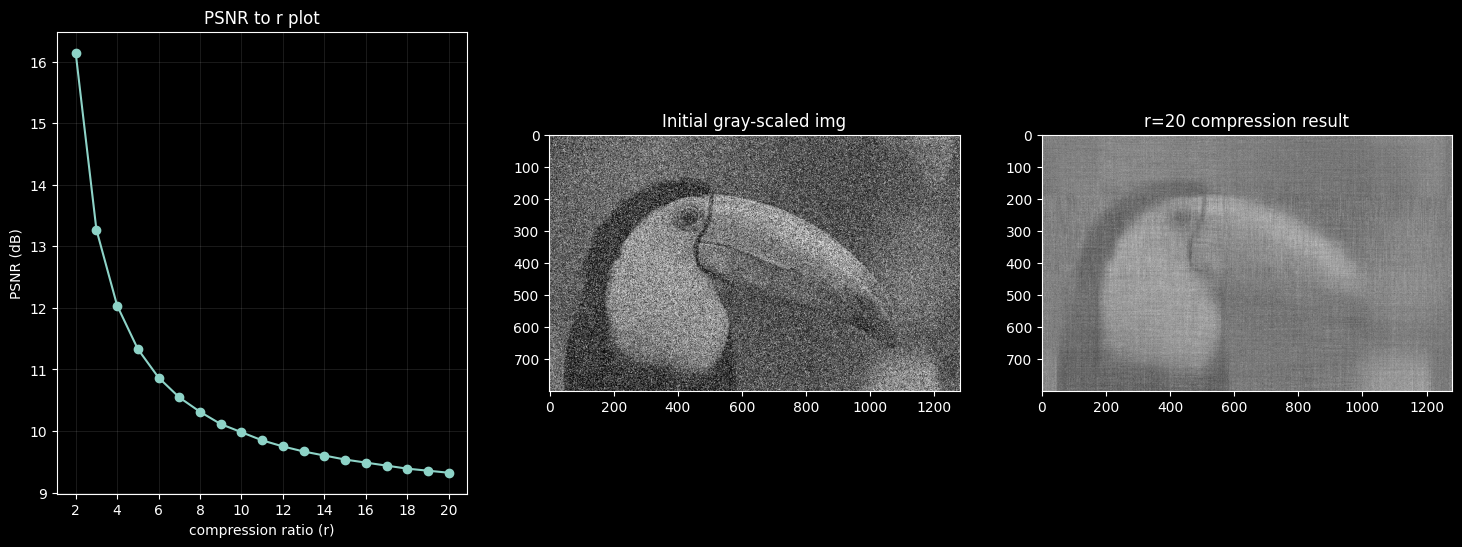

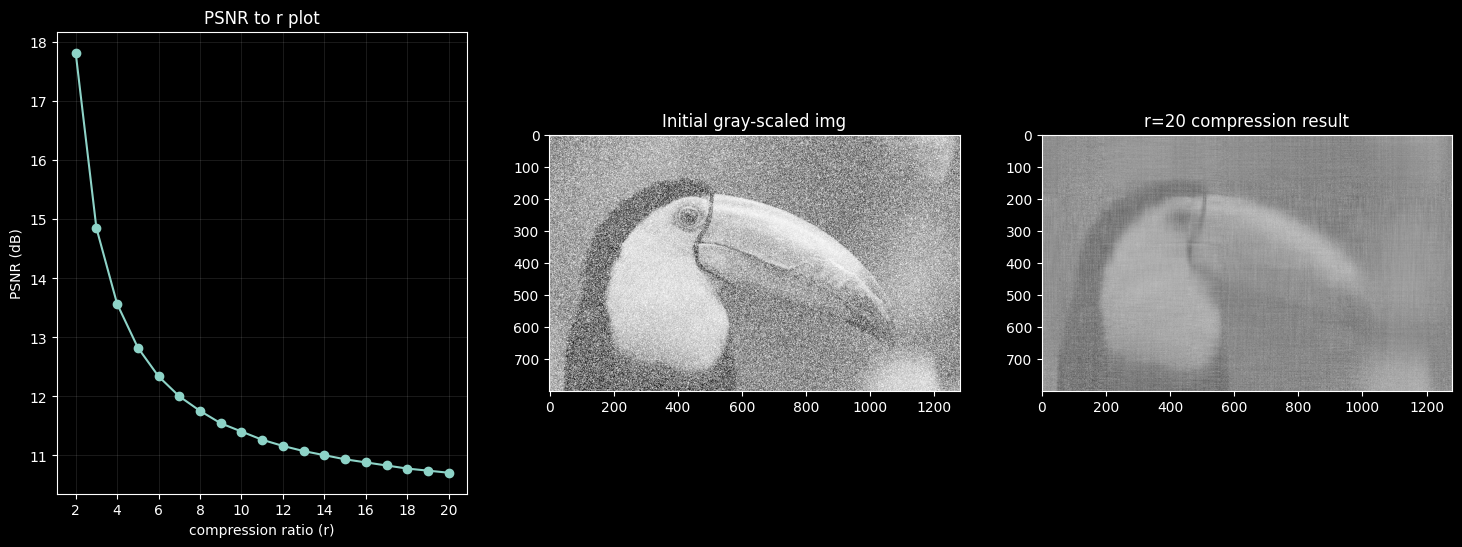

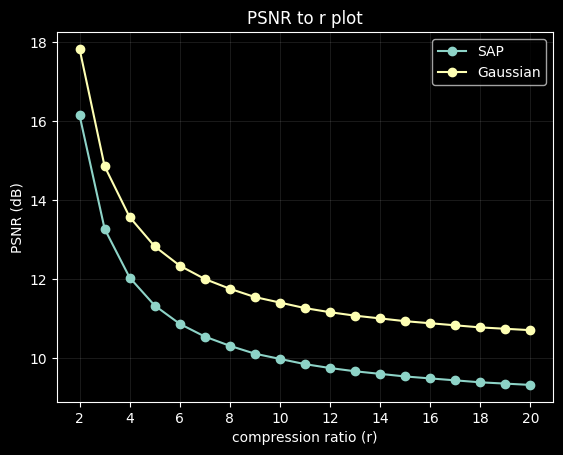

In [37]:
##Your Code start here
def SAP_noise(image, salt_r, pepper_r):
  row, col = image.shape
  salt = np.random.rand(row, col) < salt_r
  pepper = np.random.rand(row, col) < pepper_r
  noisy_image = np.copy(image)
  noisy_image[salt] = 255
  noisy_image[pepper] = 0
  MSE = mean_squared_error(noisy_image, image)
  print(f"Initial SAP noised image PSNR :{10*math.log10((255*255)/MSE)}")
  return noisy_image


def gaussian_noise(image, mean, std):
  noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
  noisy_image = cv2.add(image, noise)
  MSE = mean_squared_error(noisy_image, image)
  print(f"Initial gaussian noised image PSNR :{10*math.log10((255*255)/MSE)}")
  return noisy_image


def PSNR(img):
    U, S, VT = np.linalg.svd(img, full_matrices=False)
    m,n = img.shape
    psnr = []
    for r in range(2,21):
      boundary = int(m/r)
      recon_img = U[:, :boundary] @ np.diag(S[:boundary]) @ VT[:boundary, :]
      MSE = mean_squared_error(img, recon_img)
      psnr.append(10*math.log10((255*255)/MSE))

    return psnr

def comp_plot(SAP_PSNR ,GAUS_PSNR):
  plt.plot(range(2,21),SAP_PSNR,"o-",label='SAP')
  plt.plot(range(2,21),GAUS_PSNR,"o-",label='Gaussian')
  plt.xlabel('compression ratio (r)',)
  plt.ylabel("PSNR (dB)")
  plt.title('PSNR to r plot')
  plt.xticks(np.arange(2, 21, 2))
  plt.grid(alpha=0.1)
  plt.legend()
  plt.show()

img = cv2.imread("pic.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

SAP_noised_img = SAP_noise(gray_image ,0.3 ,0.3)
guassian_noised_img = gaussian_noise(gray_image, 0, 5)



PSNR_plotter(SAP_noised_img)
PSNR_plotter(guassian_noised_img)


comp_plot(PSNR(SAP_noised_img) , PSNR(guassian_noised_img))


##Your Code ends here

📃 | Conclusion :

The thing with salt and pepper is that it produces high frequency changes between 0 and 255 making it more sophisticated and unable to be reconstructed as a low-rank matrix. As in contrast, guassian noise ,has a range in its fluctuations, making it smoother and easier to have low-rank approximations. As we can also see in the plot with equal initial PSNR values, the SAP noised pic did indeed diminished with a higher slope. picking a higher SD for guassian noise and distinguishing it from salt and pepper can give us a better and more exaggereted vision upon the point made above.

(Also sry if the added noise is a bit excessive 🥴)

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('dark_background')              # for sake of dark theme lovers :)
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples


# Disclaimer : I didn't import this to hide warnings on my code, it was giving
#              an explanation about the update of one of the libraries and the
#              the change upon its default settings. As it was pretty annoying
#              I imported the lib below to hide the notices.
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [42]:
Datapoint = pd.read_csv('Datapoint.csv', header = None)

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

🧠 | My opinion:

The higher the corelation goes it means that criterion includes more unique data and cooler cells(like the 7th feature), so if we're gonna ignore some of the features we should neglect the ones having the most correlation with other features and display warmer tones. (like the 5th or 6th feature)

So overall I feel like it's possible to decrease them up to 4 features.

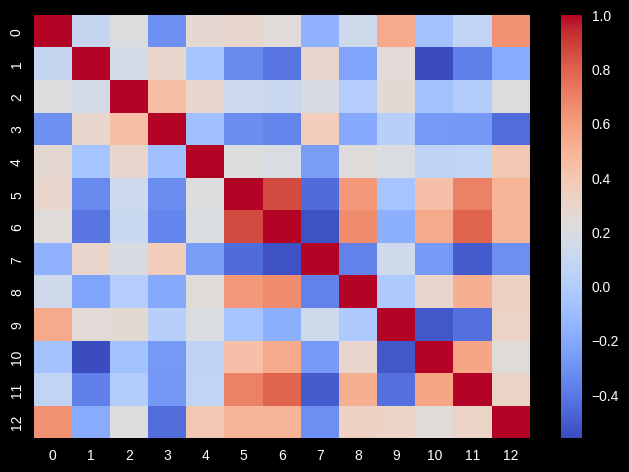

In [43]:
##Your Code start here
dataplot = sns.heatmap(Datapoint.corr(), cmap="coolwarm", annot=False) #make annot=Ture to see the numbers
plt.show()                                                             #I turned it off cuz it was a bit messy
##Your Code ends here

###  Data Preprocessing

In [44]:
Datapoint.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

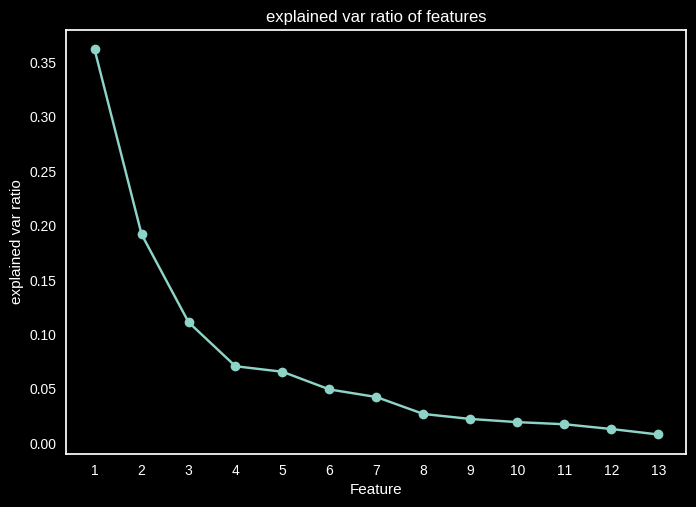

In [45]:
##Your Code start here
stdScaled_Datapoint = (Datapoint - Datapoint.mean(axis = 0)) / Datapoint.std(axis = 0)

cov_mat = np.cov(stdScaled_Datapoint , rowvar = False)
eig_val, eig_vec = np.linalg.eigh(cov_mat)
sort_indices = np.flip(np.argsort(eig_val))
eig_val = eig_val[sort_indices]
eig_vec = eig_vec[:,sort_indices]

explained_var_ratio = eig_val/np.sum(eig_val)  #can also divide it by sum of vars to map 'em to [0-1]

plt.plot(range(1,14), explained_var_ratio,'o-')
plt.xlabel('Feature')
plt.ylabel("explained var ratio")
plt.title('explained var ratio of features')
plt.xticks(range(1,14))
plt.grid(False)
##Your Code ends here

Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [46]:
##Your Code start here
r = 4
selected_eig_vec = eig_vec[:,0:r]
reduced_feat1 = stdScaled_Datapoint @ selected_eig_vec
print(reduced_feat1)
##Your Code ends here

            0         1         2         3
0   -3.307421  1.439402  0.165273 -0.215025
1   -2.203250 -0.332455  2.020757 -0.290539
2   -2.509661  1.028251 -0.980054  0.722863
3   -3.746497  2.748618  0.175696  0.566386
4   -1.006070  0.867384 -2.020987 -0.408613
..        ...       ...       ...       ...
173  3.361043  2.210055  0.341606  1.055549
174  2.594637  1.752286 -0.206997  0.348513
175  2.670307  2.753133  0.938295  0.311157
176  2.380303  2.290884  0.549147 -0.686348
177  3.199732  2.761131 -1.011062  0.595224

[178 rows x 4 columns]


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

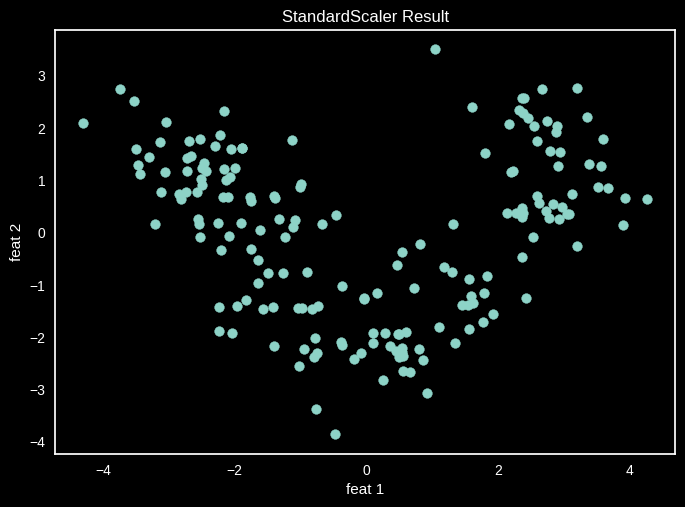

In [47]:
##Your Code start here
plt.scatter(reduced_feat1[0], reduced_feat1[1])
plt.xlabel('feat 1',)
plt.ylabel("feat 2")
plt.title('StandardScaler Result')
plt.grid(False)
##Your Code ends here

🧠 | IMO :

It seems like it's quite good to have 3 clusters.

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




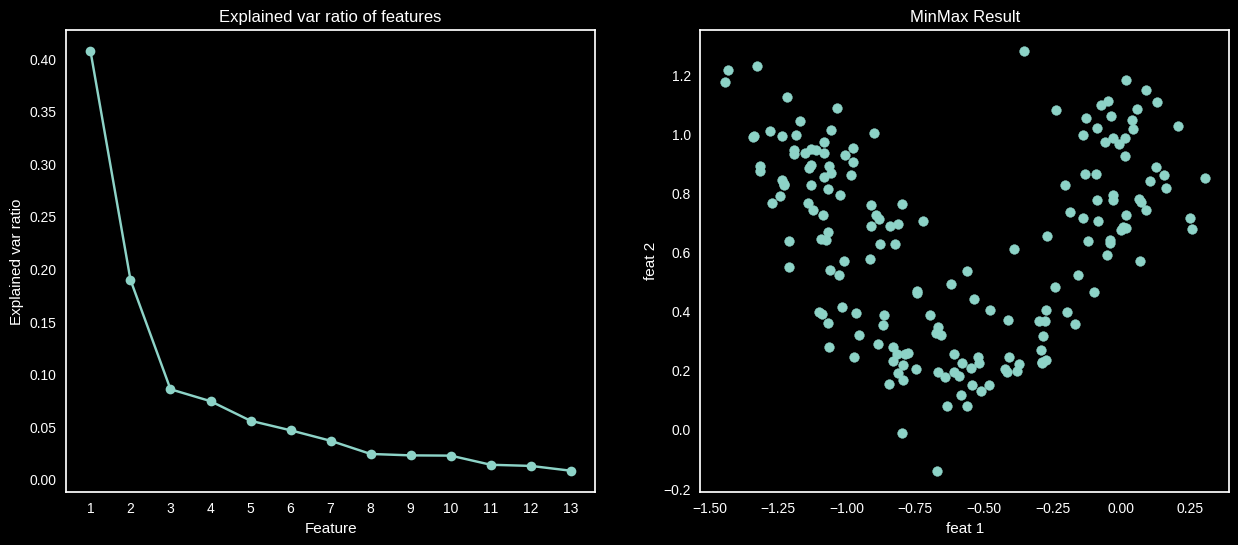

In [48]:
##Your Code start here
MinMax_scaled =  (Datapoint - Datapoint.min()) / (Datapoint.max() - Datapoint.min())

cov_mat = np.cov(MinMax_scaled , rowvar = False)
eig_val, eig_vec = np.linalg.eigh(cov_mat)
sort_indices = np.flip(np.argsort(eig_val))
eig_val = eig_val[sort_indices]
eig_vec = eig_vec[:,sort_indices]

explained_var_ratio = eig_val/np.sum(eig_val)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plt.rc('font', size=10)
ax1.plot(range(1,14),explained_var_ratio,"o-")
ax1.set_xlabel('Feature')
ax1.set_ylabel("Explained var ratio")
ax1.set_title('Explained var ratio of features')
ax1.set_xticks(range(1,14))
ax1.grid(False)


r = 4
eig_vec = eig_vec[:,:r]
reduced_feat2 = MinMax_scaled @ eig_vec

ax2.scatter(reduced_feat2[0], reduced_feat2[1])
ax2.set_xlabel('feat 1',)
ax2.set_ylabel("feat 2")
ax2.set_title('MinMax Result')
ax2.grid(False)
plt.show()
##Your Code ends here

**🆚 | The difference:**

The knee point seems to be the same in both scalers tho it's just a coincidence, the main difference is probably caused by MinMax going for 0-1 values while StandardScaler goes for 0 mean and normal distribution of sigma = 1 , by dividing them into its own sigma.

This plot also gives the vibes that it probably is the best to have 3 clusters.

### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

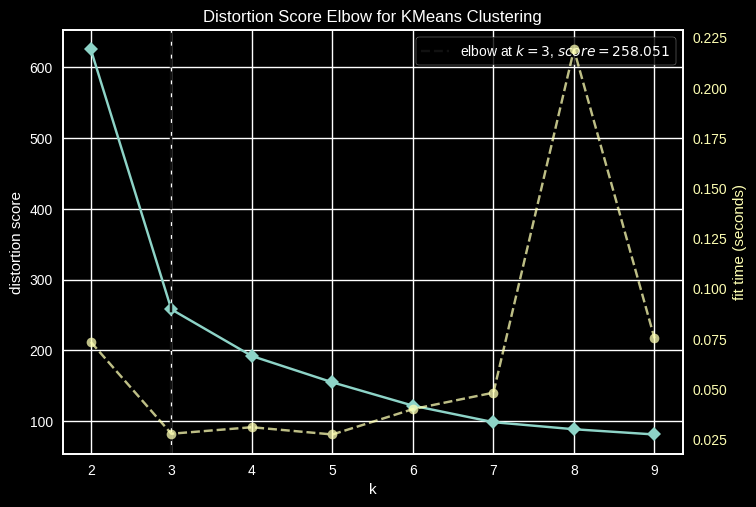

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
##Your Code start here
model = KMeans()
pca_std_datapoint = reduced_feat1.iloc[:, [0, 1]]

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(pca_std_datapoint)
visualizer.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




In [50]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 33.09it/s]


In [51]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 11.94it/s]


💬 | A brief chat:

Inertia shows the Sum of squared distances of samples to their closest cluster center and silhouette score indicates how seperated the clusters are giving an score of 0 to 1. (1=well seperated, 0=least seperation)

Plot the **inertia** and **silhouette** values

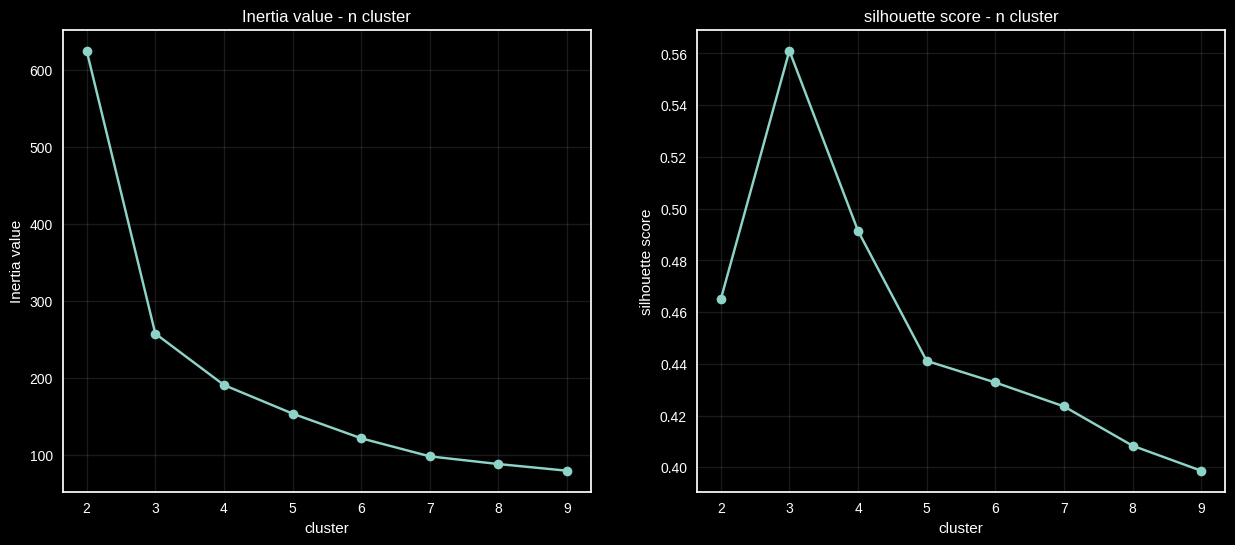

In [52]:
##Your Code start here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(range(2,10) , inertia,'o-')
ax1.set_xlabel('cluster')
ax1.set_ylabel("Inertia value")
ax1.set_title('Inertia value - n cluster')
ax1.grid(alpha=0.1)

ax2.plot(silhouette.keys() , silhouette.values(),'o-')
ax2.set_xlabel('cluster')
ax2.set_ylabel("silhouette score")
ax2.set_title('silhouette score - n cluster')
ax2.grid(alpha=0.1)
plt.show()
##Your Code ends here

📝 | Conclusion :

As we can see the breaking point of knee and also the peak of silhouette score happens at **"n=3"**.

Tune the hyper parameters based on your conclusions.

In [53]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)

#Now plot the datapoints using two first features
(Each cluster in a different colour)

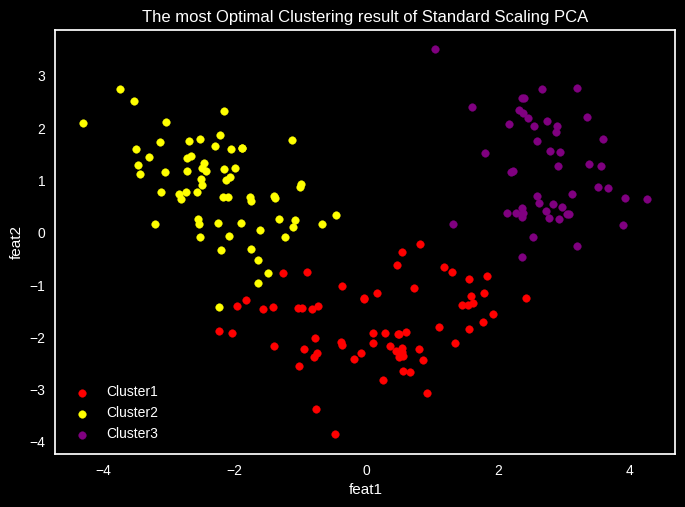

In [54]:
colors = ['red','yellow','purple']
points = np.array(pca_std_datapoint)
for i in range(3):
  a = np.array(points[np.where(y_predict_kmeans1 == i)][:,0])
  b = np.array(points[np.where(y_predict_kmeans1 == i)][:,1])
  plt.scatter(a , b , s=30, label=f"Cluster{i+1}",color=colors[i])
  plt.title("The most Optimal Clustering result of Standard Scaling PCA")
  plt.xlabel("feat1")
  plt.ylabel("feat2")
  plt.grid(False)
  plt.legend()

Do all previous steps for MinMax scaled data points.





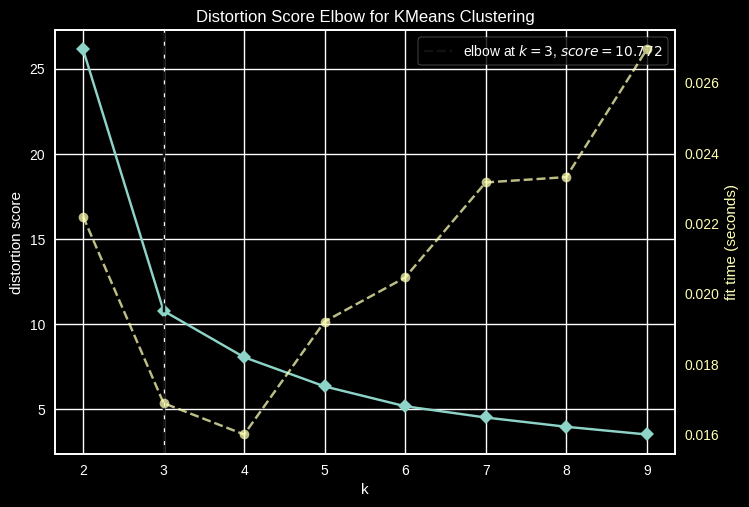

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans()
pca_std_datapoint2 = reduced_feat2.iloc[:, [0, 1]]

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(pca_std_datapoint2)
visualizer.show()

100%|██████████| 8/8 [00:00<00:00, 12.38it/s]


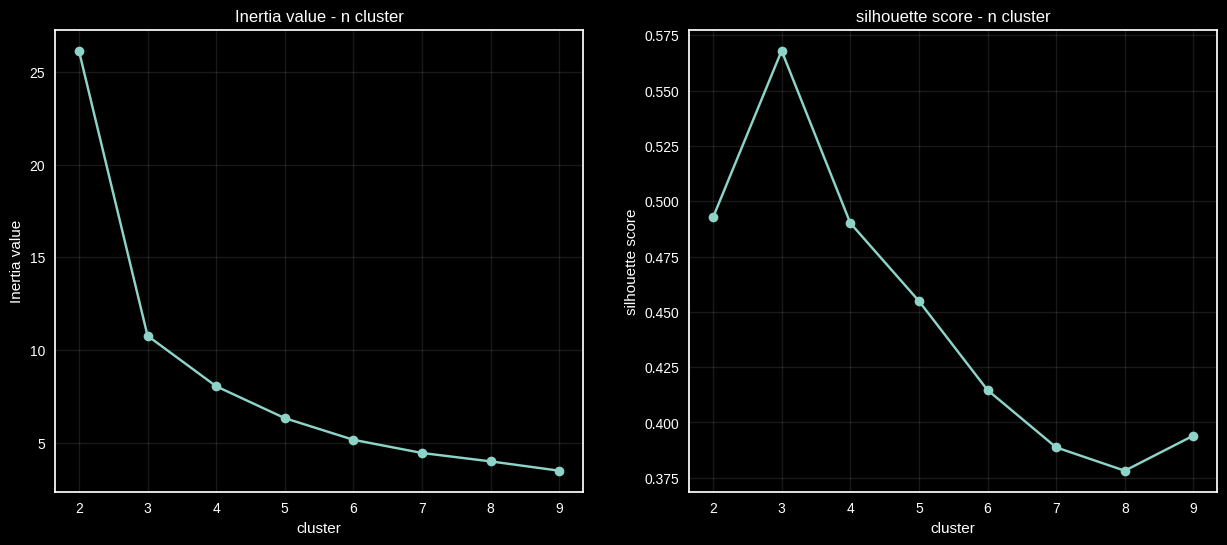

In [56]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint2)
    inertia.append(kmeans.inertia_)

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint2)
    silhouette[i] = sil(pca_std_datapoint2, kmeans.labels_, metric='euclidean')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(range(2,10) , inertia,'o-')
ax1.set_xlabel('cluster')
ax1.set_ylabel("Inertia value")
ax1.set_title('Inertia value - n cluster')
ax1.grid(alpha=0.1)

ax2.plot(silhouette.keys() , silhouette.values(),'o-')
ax2.set_xlabel('cluster')
ax2.set_ylabel("silhouette score")
ax2.set_title('silhouette score - n cluster')
ax2.grid(alpha=0.1)
plt.show()

In [57]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans.fit_predict(pca_std_datapoint2)

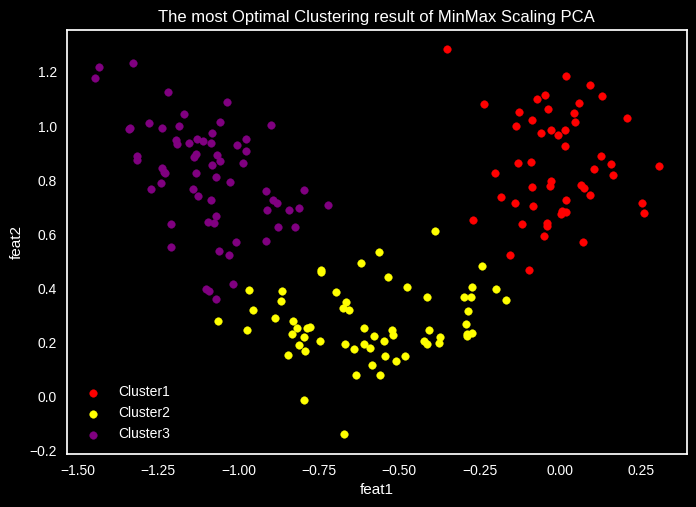

In [58]:
colors = ['red','yellow','purple']
points2 = np.array(pca_std_datapoint2)
for i in range(3):
  a = np.array(points2[np.where(y_predict_kmeans2 == i)][:,0])
  b = np.array(points2[np.where(y_predict_kmeans2 == i)][:,1])
  plt.scatter(a , b , s=30, label=f"Cluster{i+1}",color=colors[i])
  plt.title("The most Optimal Clustering result of MinMax Scaling PCA")
  plt.xlabel("feat1")
  plt.ylabel("feat2")
  plt.grid(False)
  plt.legend()

Compare the results of different scaling methods in a PCA problem

**🆚 | Comparison:**

They kinda gave us the same number of clustering,tho they have different dispersions. The MinMax maps the values into [0-1] then continues the calculation while StandardScaler tries to give a normal distribution of mean=0 and sigma=1 by taking their means to 0 and dividing them by their SD. The debate goes on and there's no answer on which one is always better.

For instance, if we have outliers the MinMaxScaler can give us a pretty terrible scaling as the min or max is set to and outlier data, hence Standard Scaler can come in handy.

On the other hand if our data doesn't follow any specific distribution and includes no abnormal outliers, MinMax Scaling will be a wiser choise.

As our feat1 & feat2 had some features required to be scaled by both, it kinda gave us good results on both scalings.